In [54]:
# Import all important Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)


### Load the Data

In [55]:
df_store = pd.read_csv(r"C:\Users\VARUN\Downloads\rossmann-store-sales\store.csv")
df_train = pd.read_csv(r"C:\Users\VARUN\Downloads\rossmann-store-sales\train.csv")
df_test = pd.read_csv(r"C:\Users\VARUN\Downloads\rossmann-store-sales\test.csv")

##### We already have a brief description of fields in our dataset:
    
* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


### Data Cleaning

Now let's take a closer look in the inforamtion of these datasets, e.g. size, shape, missing values, ..etc

In [56]:
# visualize store data 
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [57]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###### As we can see this dataset, has total 1115 records

In [58]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

##### Outliers in the columns

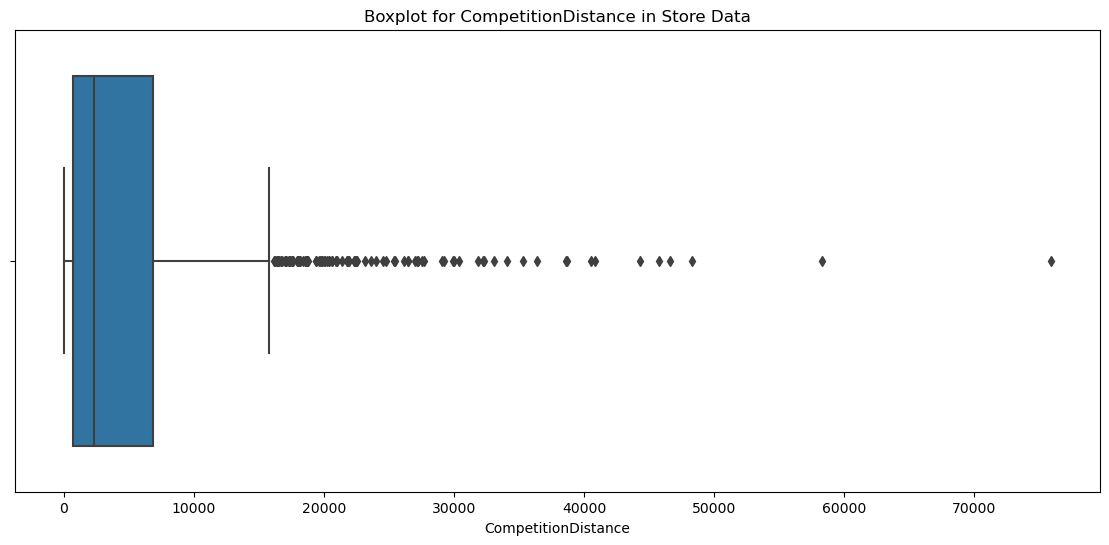

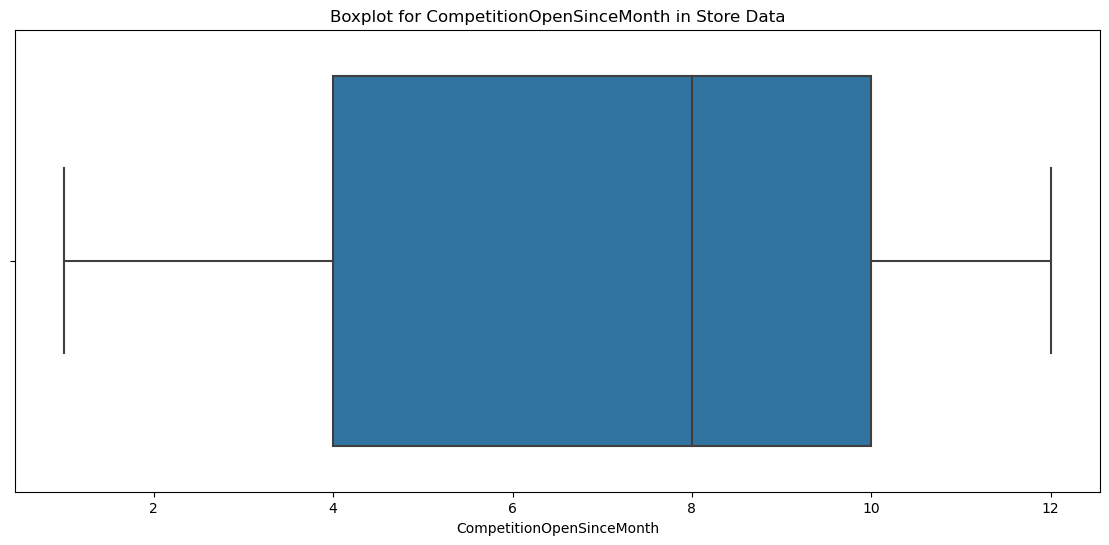

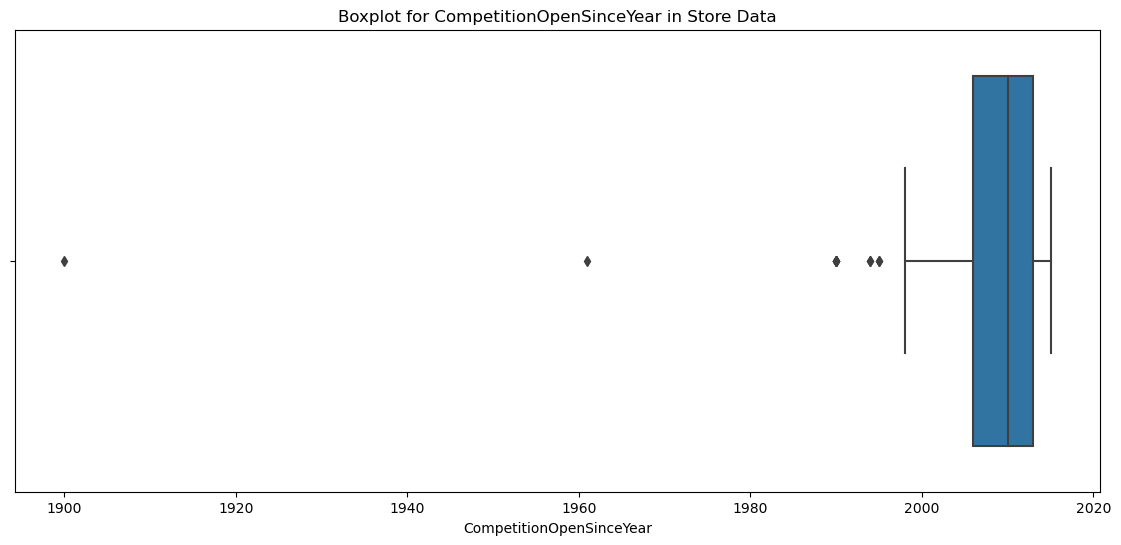

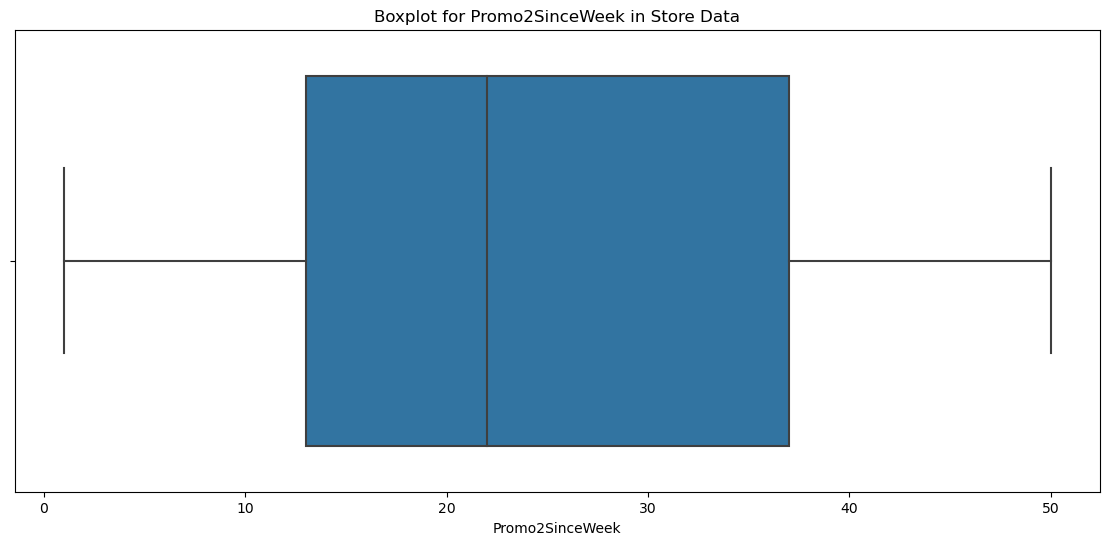

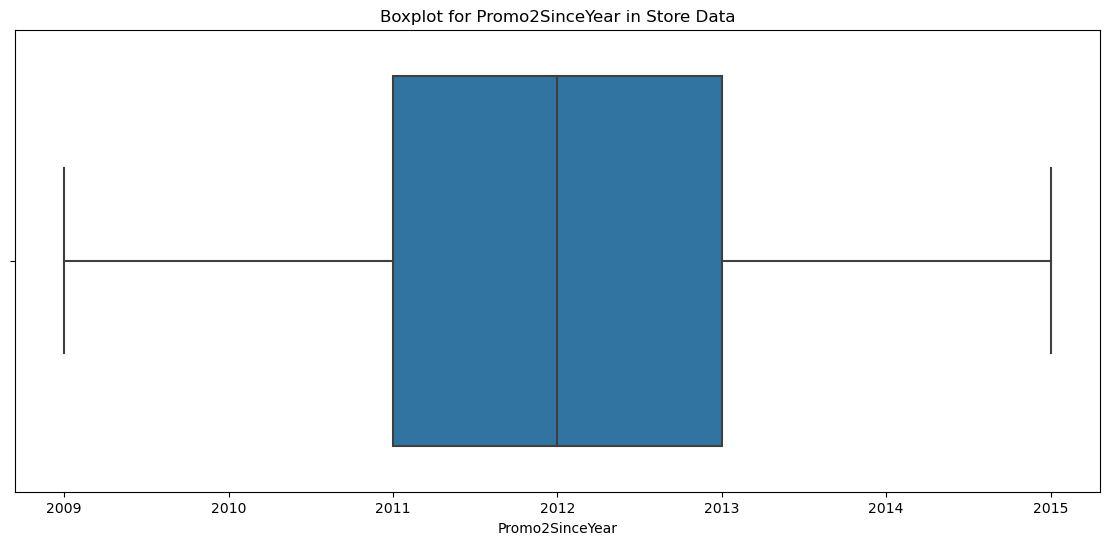

In [59]:
# Identify outliers in numeric columns using box plots
numeric_columns = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

for column in numeric_columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=df_store[column])
    plt.title(f'Boxplot for {column} in Store Data')
#     plt.savefig(f'boxplot_{column}df_store.png')
    plt.show()


Insight -> we are seeing outliers in 'CompetitionDistance' and 'CompetitionOpenSinceYear'but none of the other columns have outliers ..So we have to handle them. 

#### Handling outliers using the Interquartile Range (IQR) method

In [60]:
# Define a function to handle outliers using IQR
def handle_outliers_iqr(column, df):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values outside the bounds with NaN
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])

# Apply the IQR method to CompetitionDistance
handle_outliers_iqr('CompetitionDistance', df_store)

# Apply the IQR method to CompetitionOpenSinceYear
handle_outliers_iqr('CompetitionOpenSinceYear', df_store)

In [62]:
# Check outliers After Handling the columns

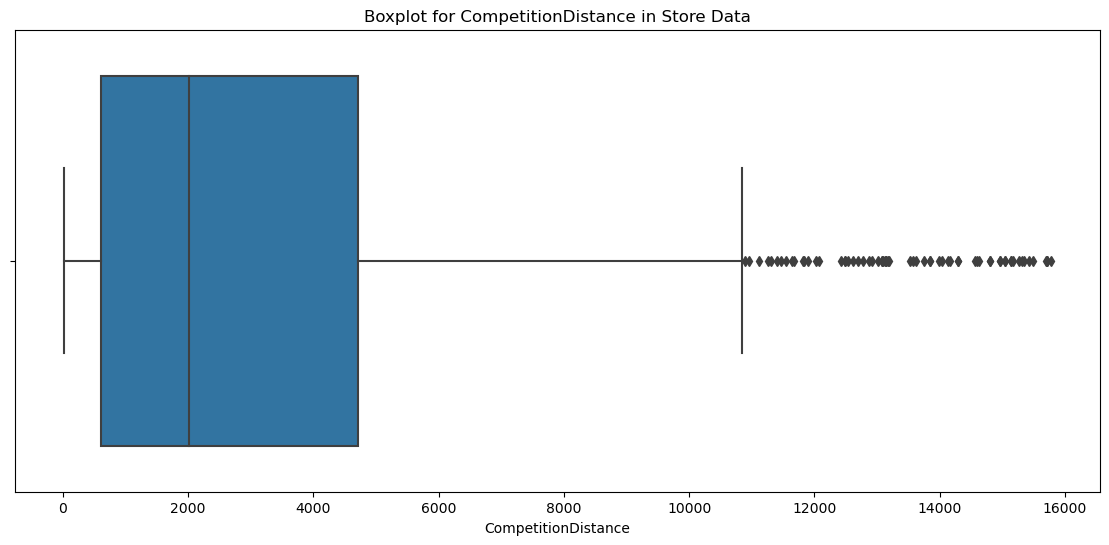

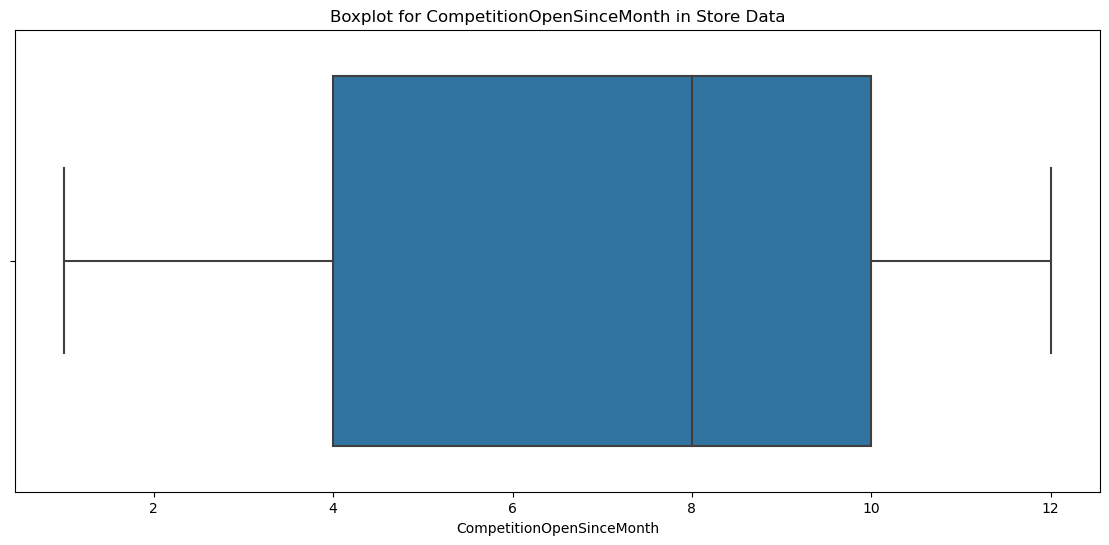

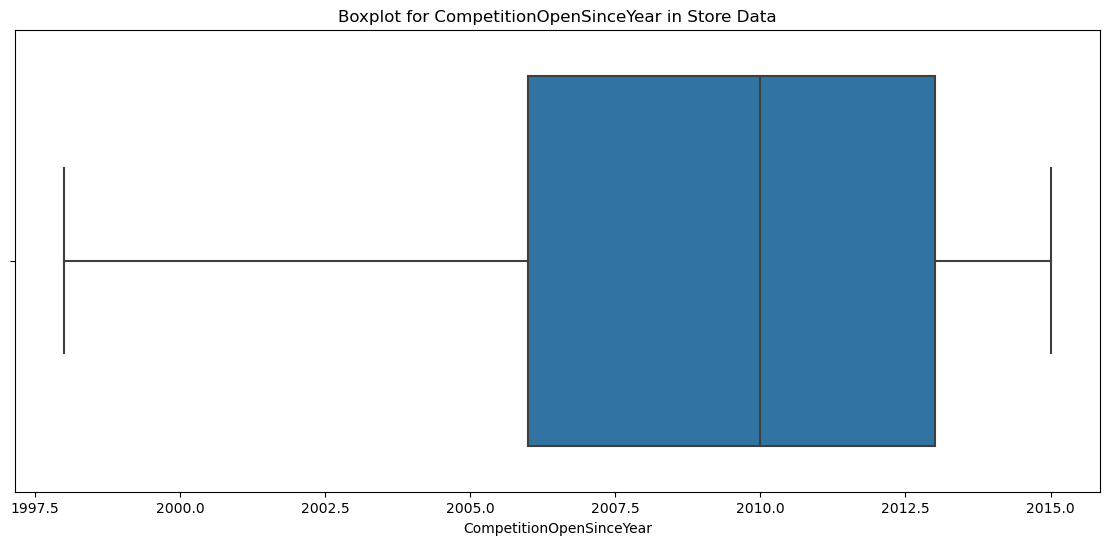

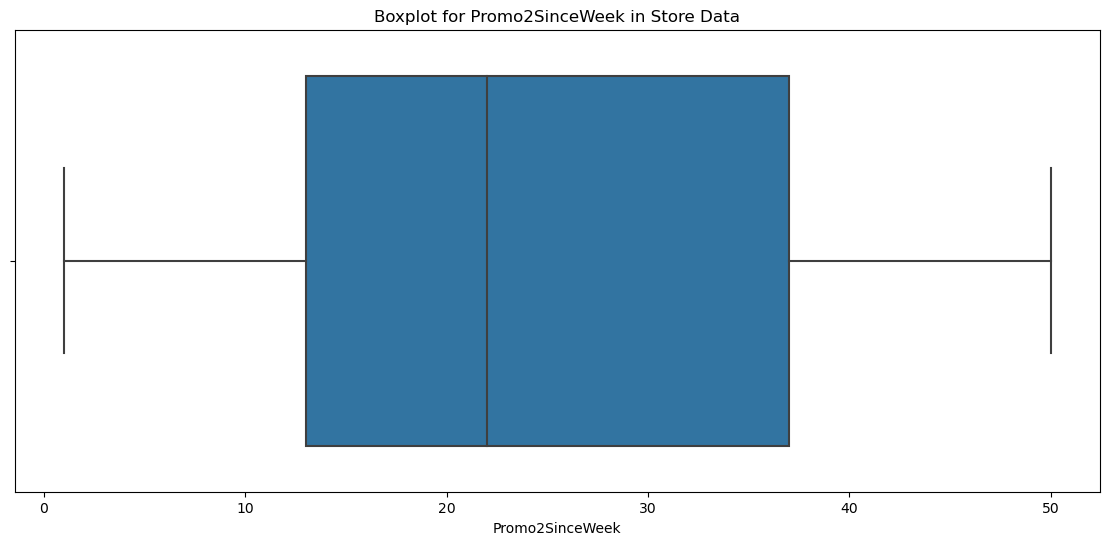

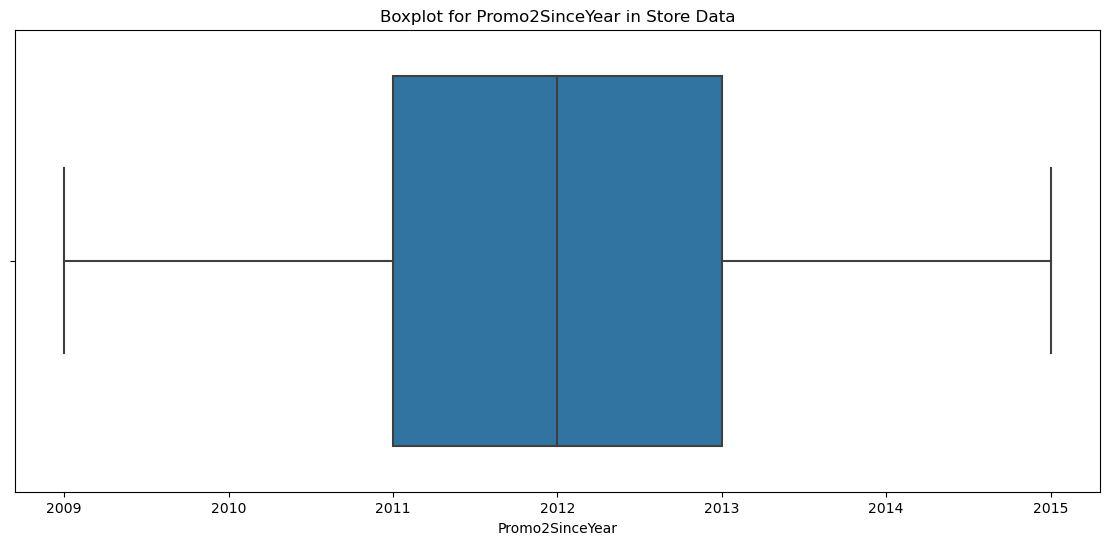

In [63]:
# Identify outliers in numeric columns using box plots
numeric_columns = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

for column in numeric_columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=df_store[column])
    plt.title(f'Boxplot for {column} in Store Data')
#     plt.savefig(f'boxplot_{column}df_store.png')
    plt.show()


Now the outliers which were in the above column have been handled properly

#### Interpret Pair Plots:

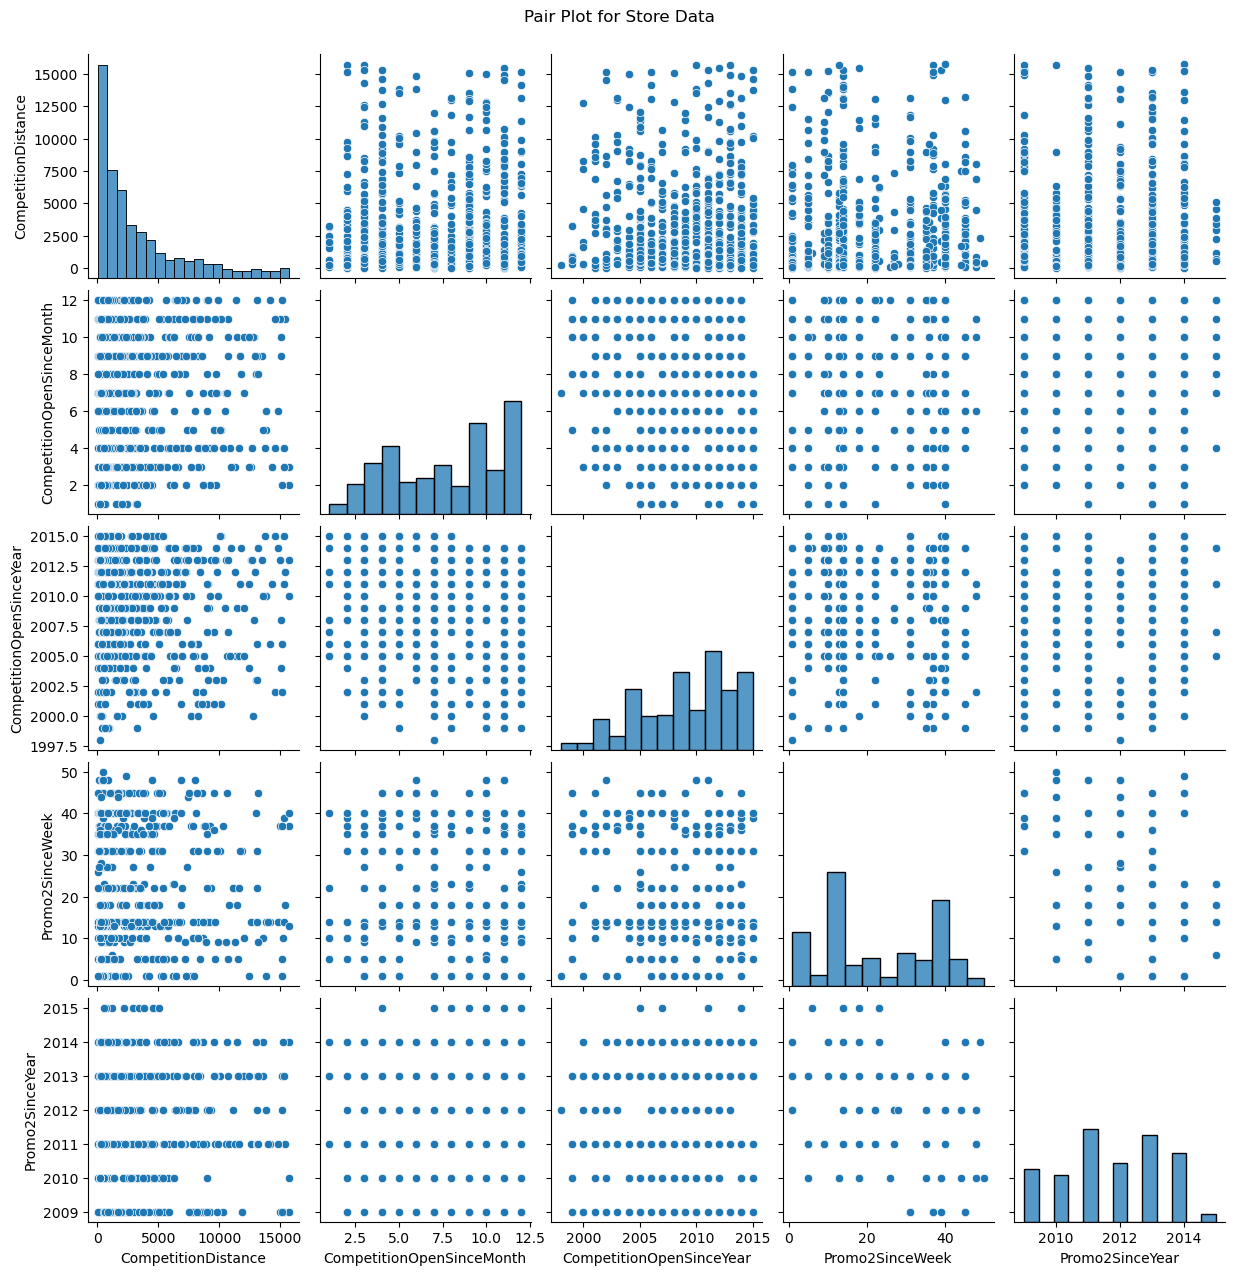

In [64]:
sns.pairplot(df_store[numeric_columns])
plt.suptitle('Pair Plot for Store Data', y=1.02)
# plt.savefig('pairplot_store_data.png')
plt.show()

Correlation Analysis:

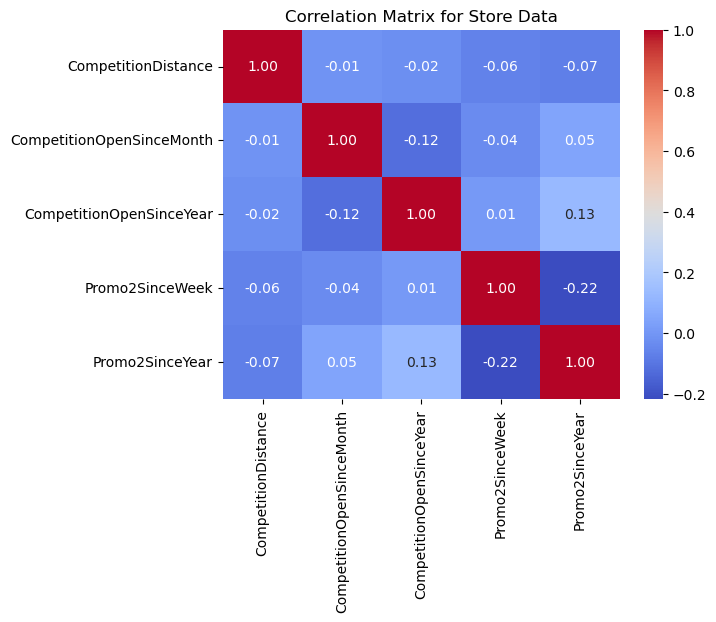

In [65]:
# Correlation matrix for store data
correlation_store = df_store[numeric_columns].corr()
sns.heatmap(correlation_store, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Store Data')
# plt.savefig('correlation_matrix_store_data.png')
plt.show()

### Fill the missing value

Start by cleaning data and fill missing values, for the competitionDistance we filled missing values by median. I assume the distance is by meter, right?!

In [66]:
# Filling null with median
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)
# df_store.isnull().sum()

Next we have CompetitionOpenSinceMonth and CompetitionOpenSinceYear, for these I just pick up the first month of the year exist and the eldest year.

In [67]:
print(df_store['CompetitionOpenSinceMonth'].min())
print(df_store['CompetitionOpenSinceYear'].min())

1.0
1998.0


In [68]:
# fill the missing value

df_store['CompetitionOpenSinceMonth'] = df_store['CompetitionOpenSinceMonth'].fillna(1)
df_store['CompetitionOpenSinceYear'] = df_store['CompetitionOpenSinceYear'].fillna(1990)

# df_store.isnull().sum()

Finally in store dataframe we have Promo2SinceWeek, Promo2SinceYear and Promo2Interval.. let's look at the unique values as they are not too many

In [69]:
print(np.sort(df_store['Promo2SinceWeek'].unique()))
print(np.sort(df_store['Promo2SinceYear'].unique()))

[ 1.  5.  6.  9. 10. 13. 14. 18. 22. 23. 26. 27. 28. 31. 35. 36. 37. 39.
 40. 44. 45. 48. 49. 50. nan]
[2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]


In [70]:
df_store['Promo2SinceWeek'] = df_store['Promo2SinceWeek'].fillna(0)
df_store['Promo2SinceYear'] = df_store['Promo2SinceYear'].fillna(0)

df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64

We left with PromoInterval, as we can see in the output of cell [12] there are mainly four unique interval, so we will split the intervals into four and replace that column of PromoInterval by four new columns:

In [71]:
all_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
def getMonth(months, index):
  if(months == 0):
    return 0
  month = months.split(',')[index]
  return all_month.index(month)+1

In [72]:
df_store['PromoInterval'] = df_store['PromoInterval'].fillna(0)
df_store['PromoInterval0'] = df_store.PromoInterval.apply((lambda x: getMonth(x, 0)))
df_store['PromoInterval1'] = df_store.PromoInterval.apply((lambda x: getMonth(x, 1)))
df_store['PromoInterval2'] = df_store.PromoInterval.apply((lambda x: getMonth(x, 2)))
df_store['PromoInterval3'] = df_store.PromoInterval.apply((lambda x: getMonth(x, 3)))
df_store.drop(columns=['PromoInterval'],inplace=True)

df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,1,4,7,10
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,1,4,7,10
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0,0,0
4,5,a,a,2010.0,4.0,2015.0,0,0.0,0.0,0,0,0,0


In [73]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval0             1115 non-null   int64  
 10  PromoInterval1             1115 non-null   int64  
 11  PromoInterval2             1115 non-null   int64  
 12  PromoInterval3             1115 non-null   int64  
dtypes: float64(5), int64(6), object(2)
memory usage:

###### Now we can move on to the next which is train data:

In [74]:
# train data
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


###### This is really big dataset, 1,017,209 million+ make sense for a train data!

In [76]:
# check missing  values
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

###### Beautiful, there isn't any missing values.

#### Outliers in the columns

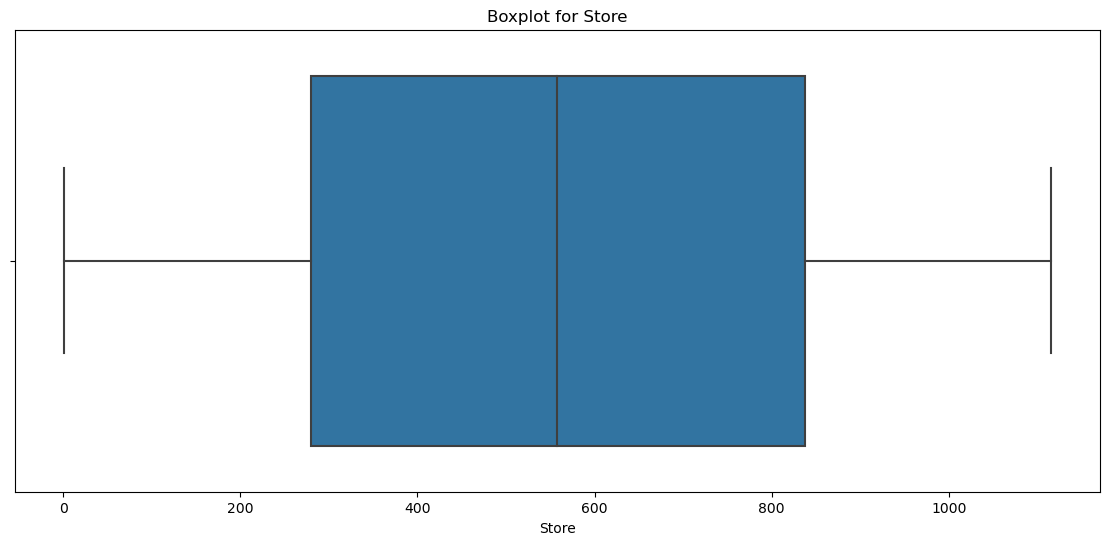

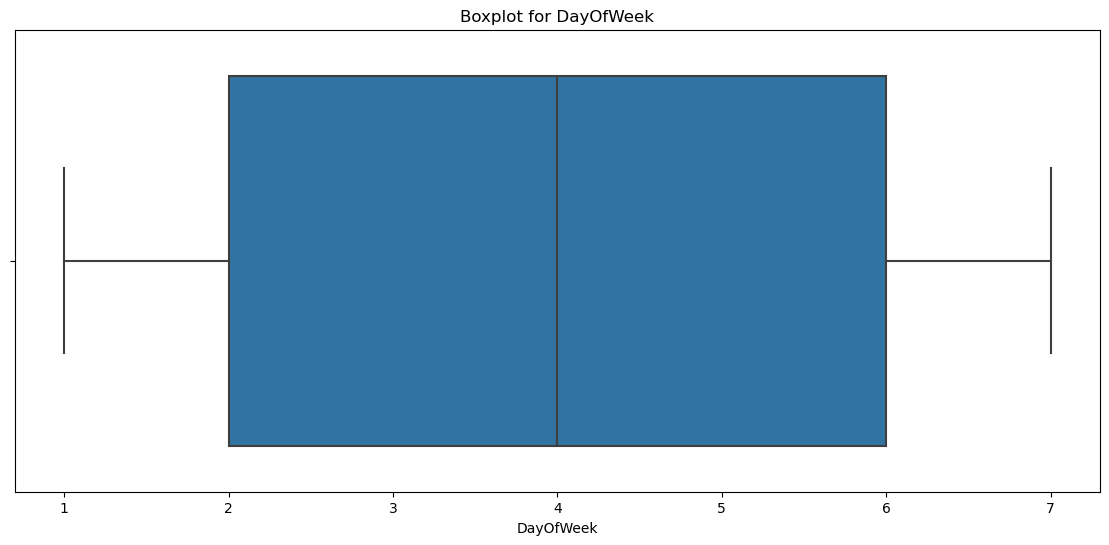

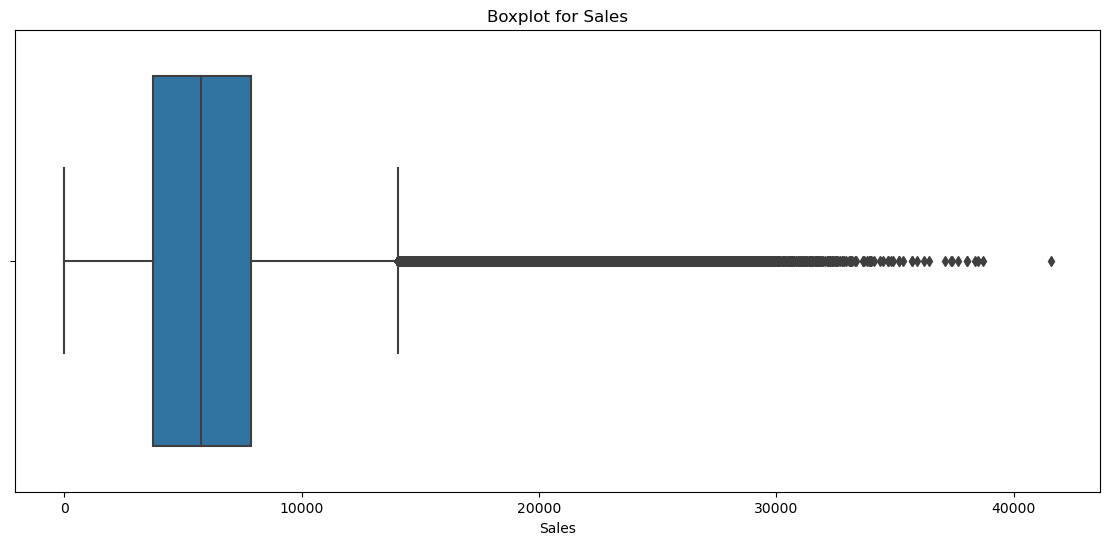

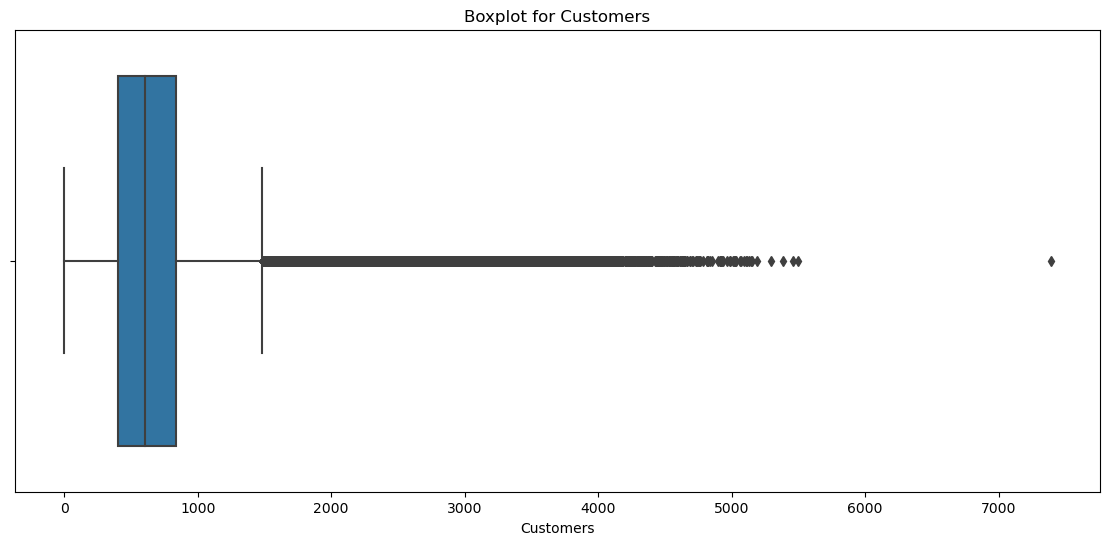

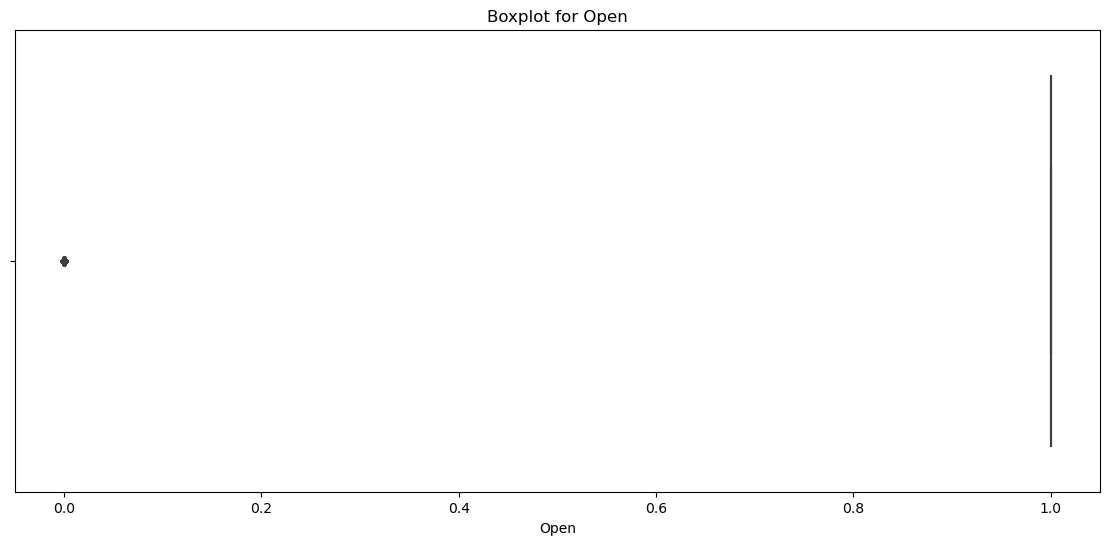

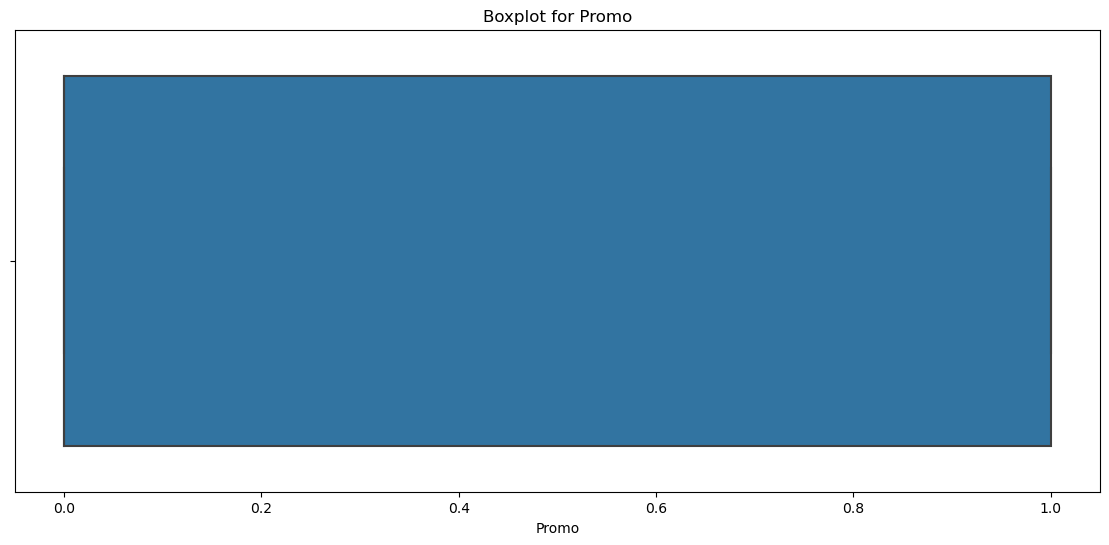

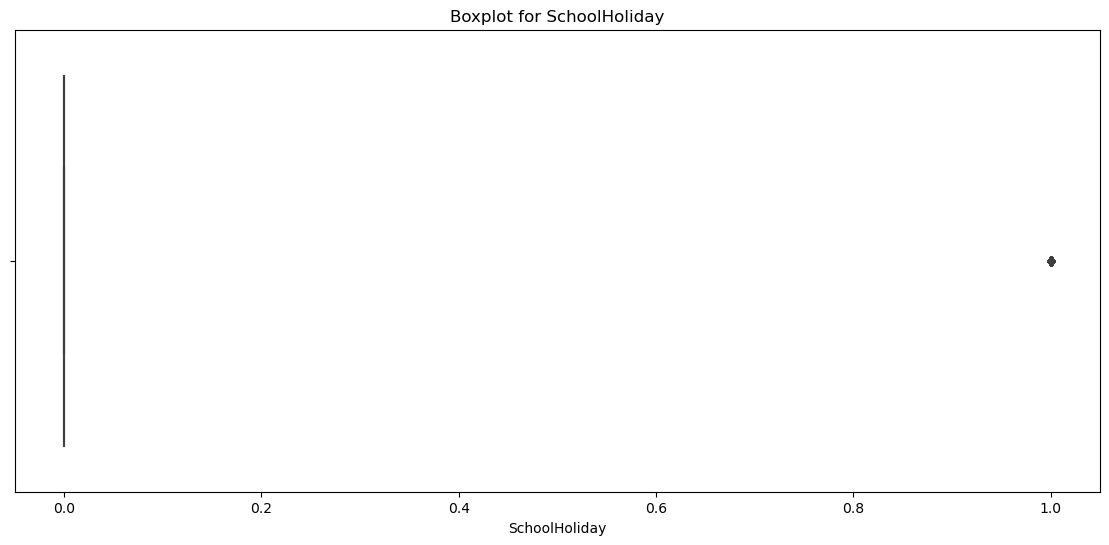

In [77]:
# Extracting numeric columns
numeric_columns = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']

# Creating box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=df_train[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

Insight -> we are seeing outliers in 'Sales','Customers','Open' and 'SchoolHoliday'but none of the other columns have outliers ..So we have to handle them.

#### Handling outliers using the Interquartile Range (IQR) method

In [78]:
# Function to handle outliers using IQR
def handle_outliers_iqr(column, df):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values outside the bounds with NaN
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])

# Apply the IQR method to Sales
handle_outliers_iqr('Sales', df_train)

# Apply the IQR method to Customers
handle_outliers_iqr('Customers', df_train)

# Apply the IQR method to Open
# handle_outliers_iqr('Open', df_train)

# Apply the IQR method to SchoolHoliday
handle_outliers_iqr('SchoolHoliday', df_train)

In [79]:
# Check outliers After Handling the columns

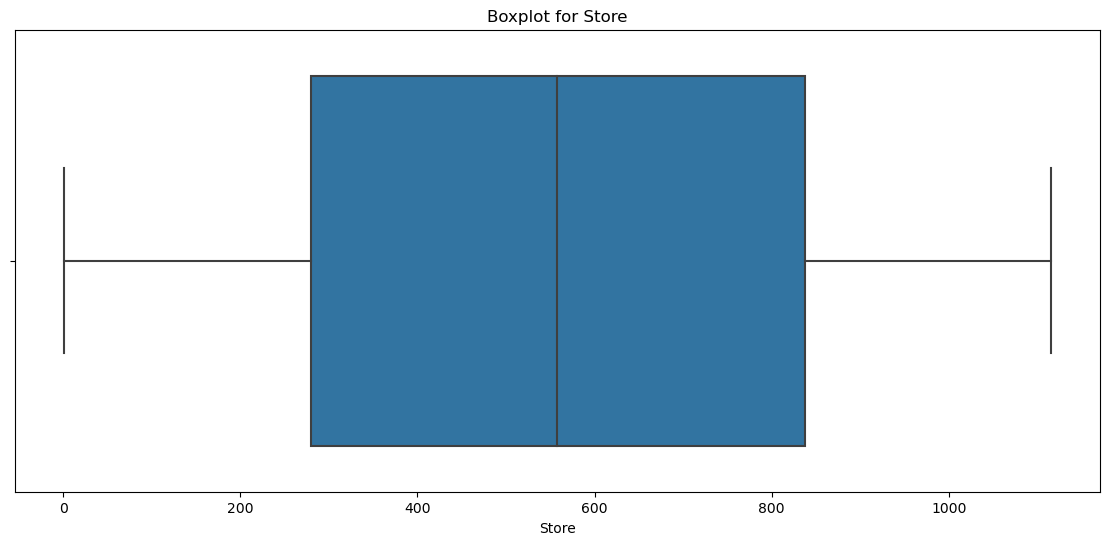

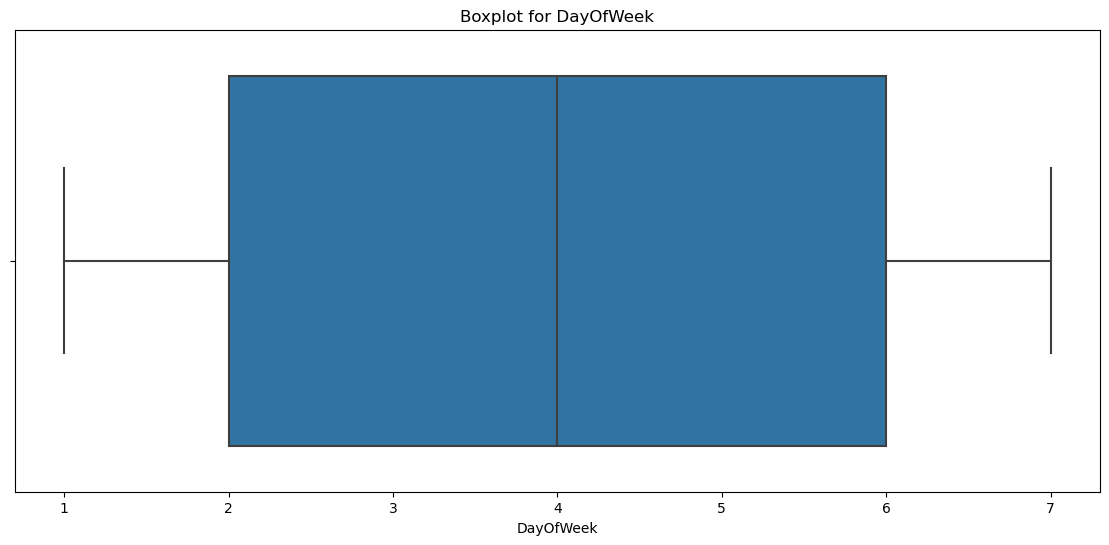

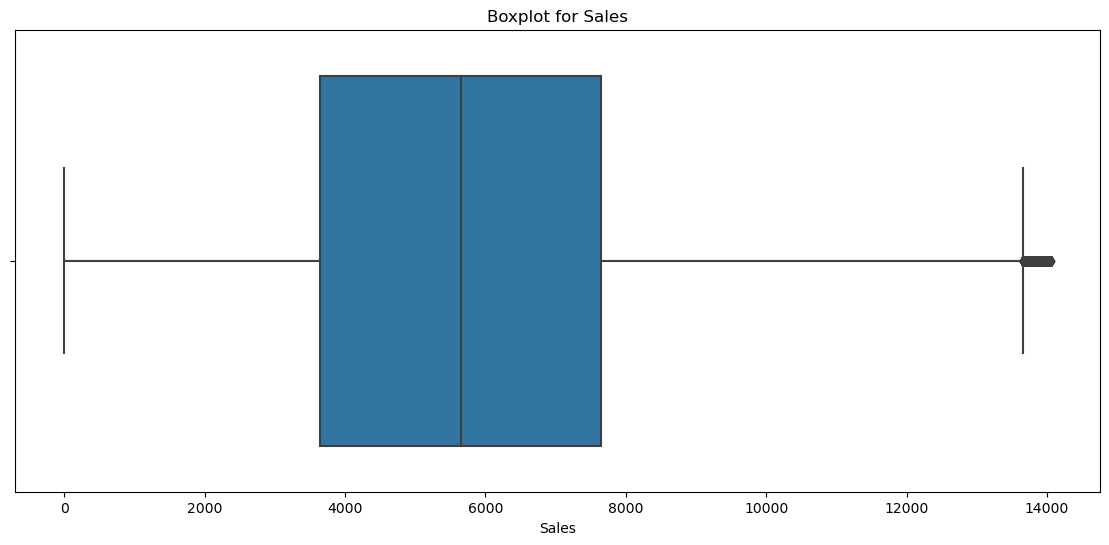

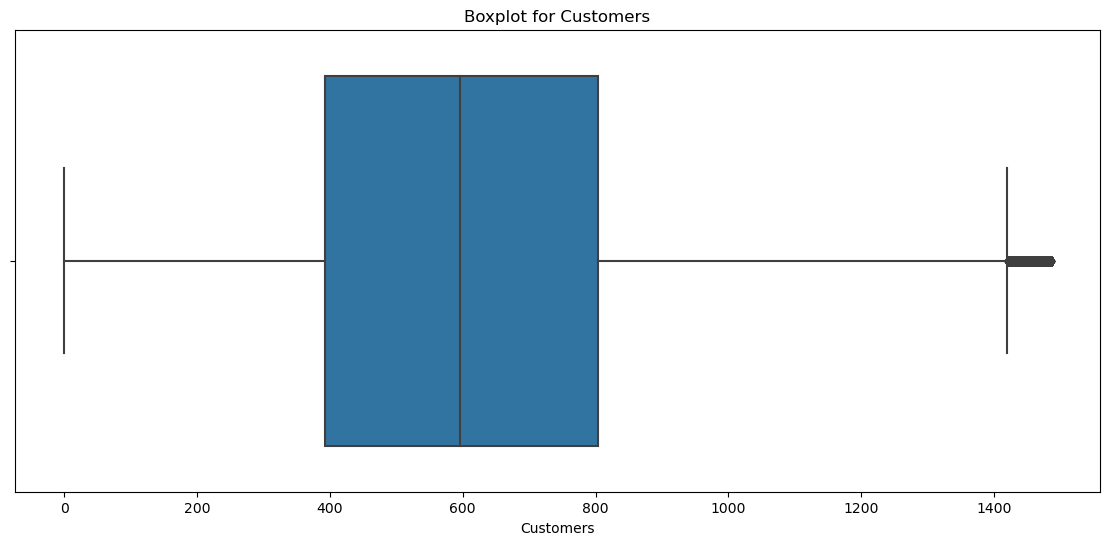

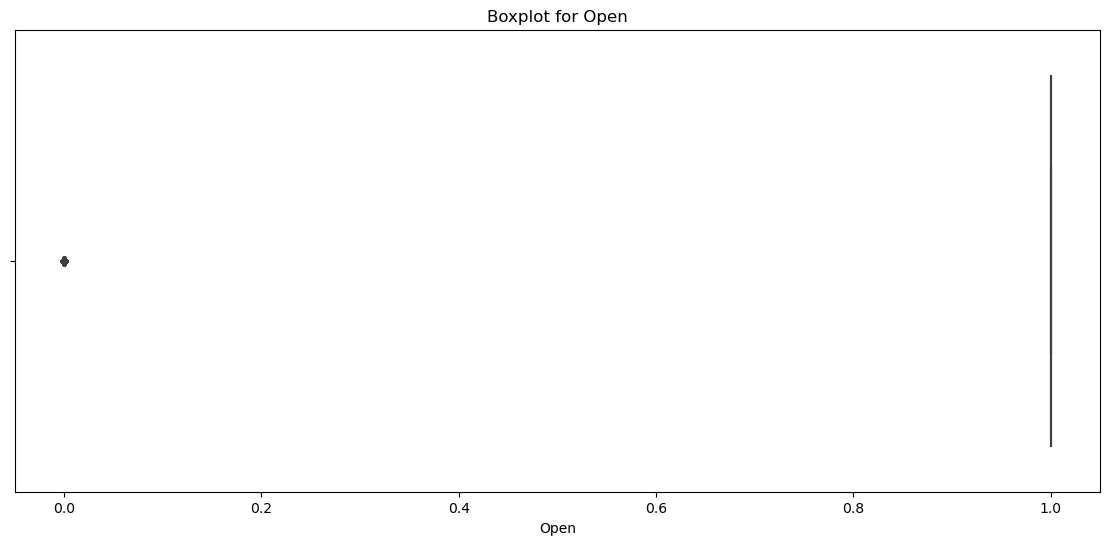

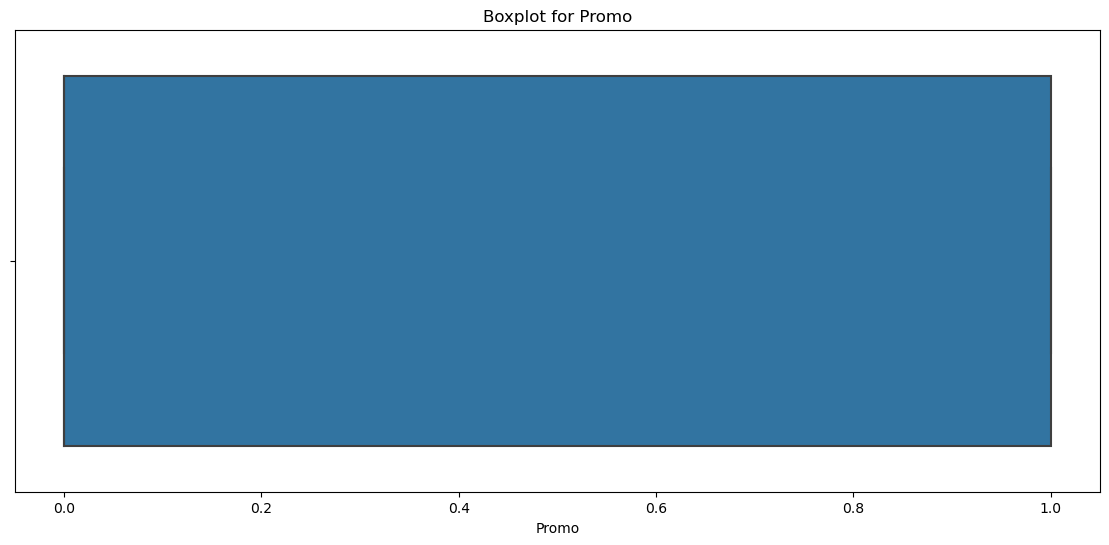

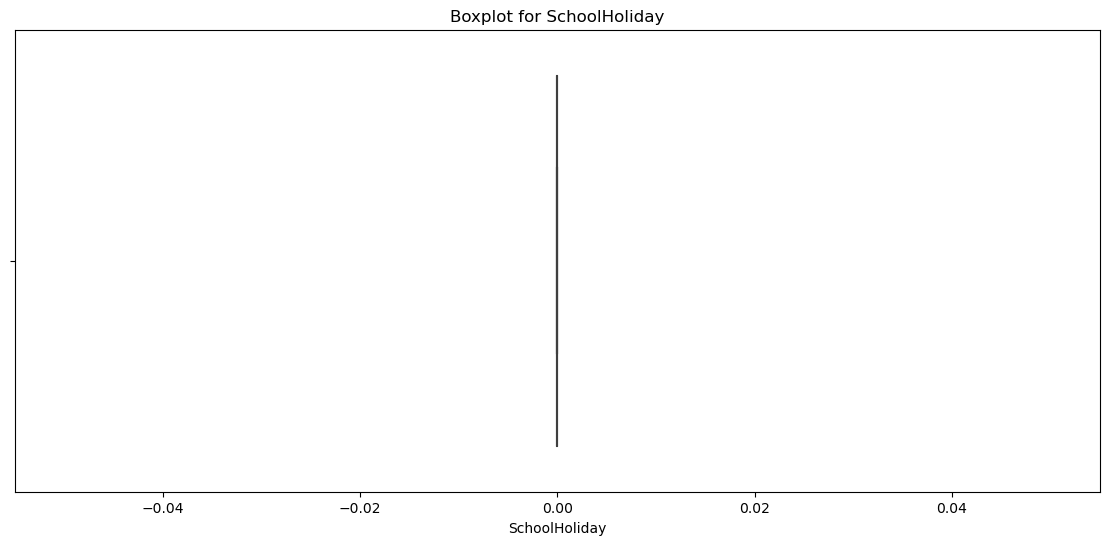

In [80]:
# Extracting numeric columns
numeric_columns = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']

# Creating box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=df_train[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

Now the outliers which were in the above column have been handled properly

#### Interpret Pair Plots:

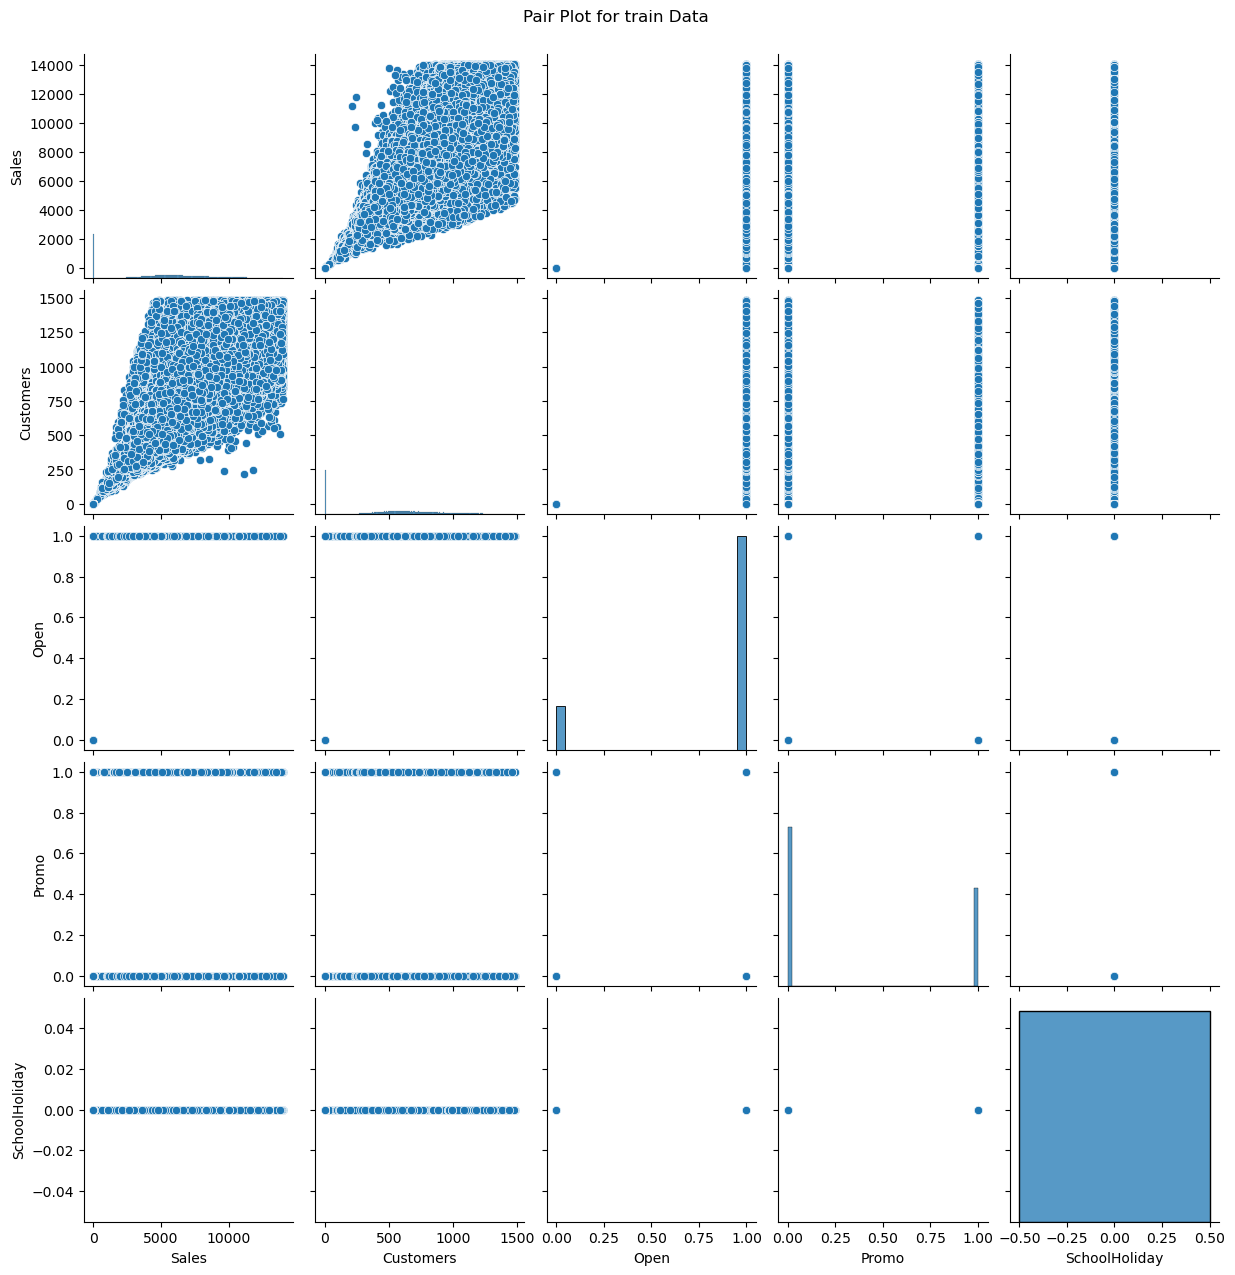

In [81]:
# Select numeric columns for pair plots

numeric_columns_train = ['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']

# Create pair plot for train data
sns.pairplot(df_train[numeric_columns_train])
plt.suptitle('Pair Plot for train Data', y=1.02)
# plt.savefig('pairplot_train_data.png')
plt.show()


Correlation Analysis:

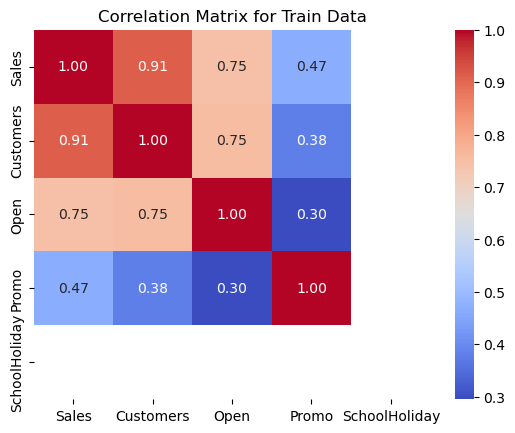

In [82]:
# Correlation matrix for train data
correlation_train = df_train[numeric_columns_train].corr()
sns.heatmap(correlation_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Train Data')
# plt.savefig('correlation_matrix_train_data.png')
plt.show()

##### Now we can move on to the next which is test data:

In [84]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [86]:
# check missing values
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

#### Outliers in the columns

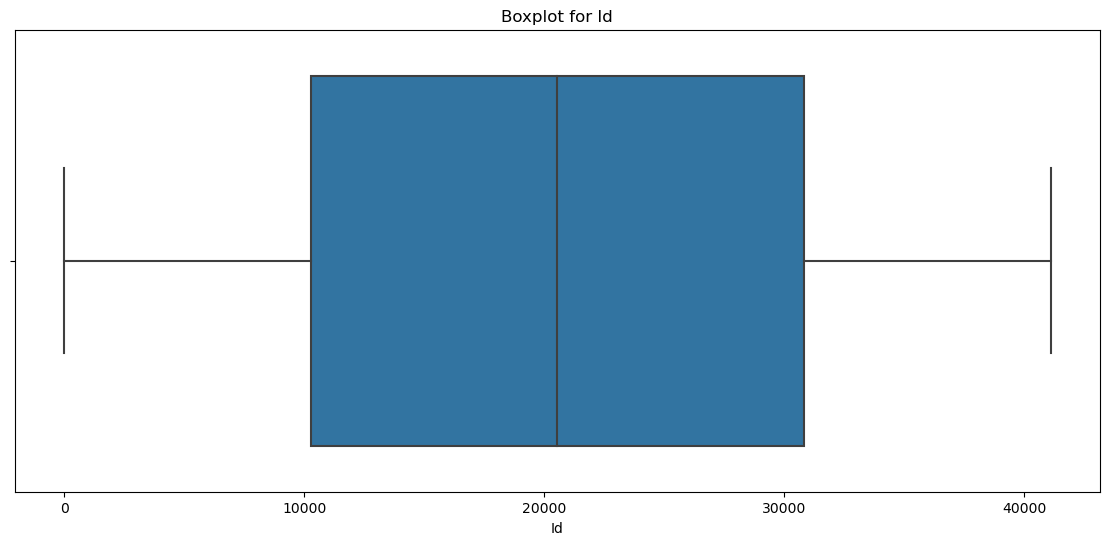

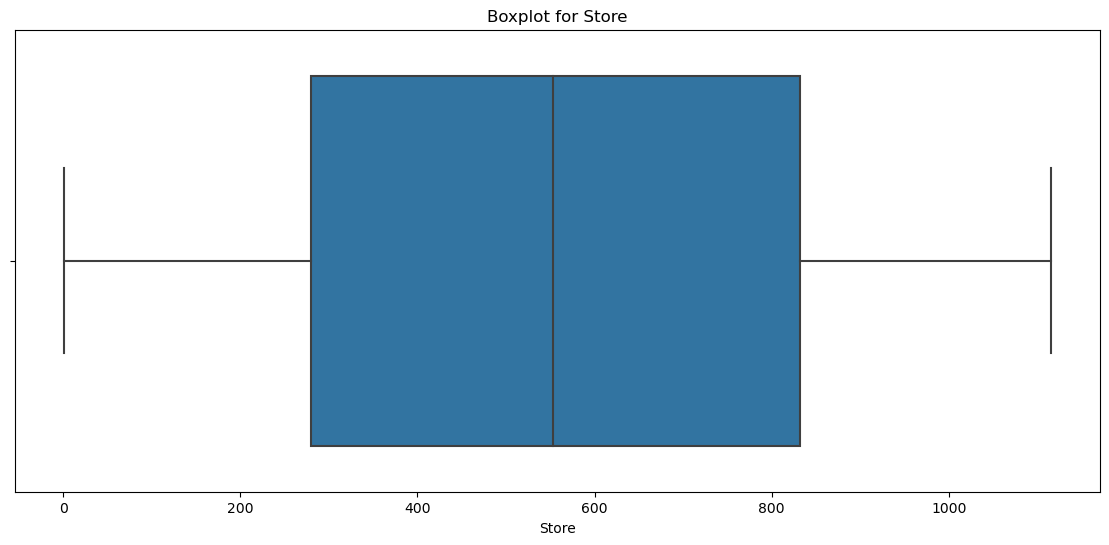

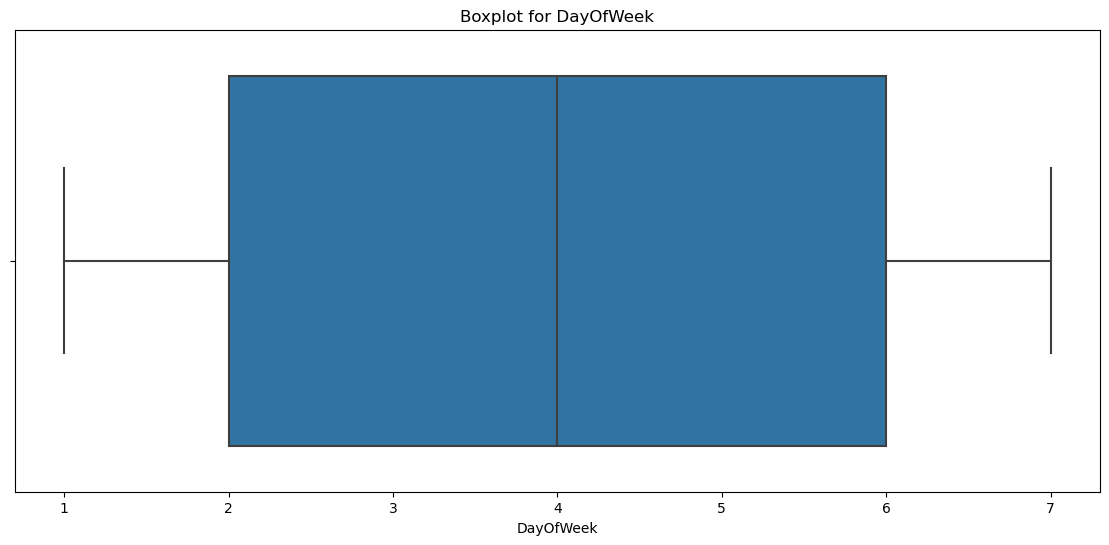

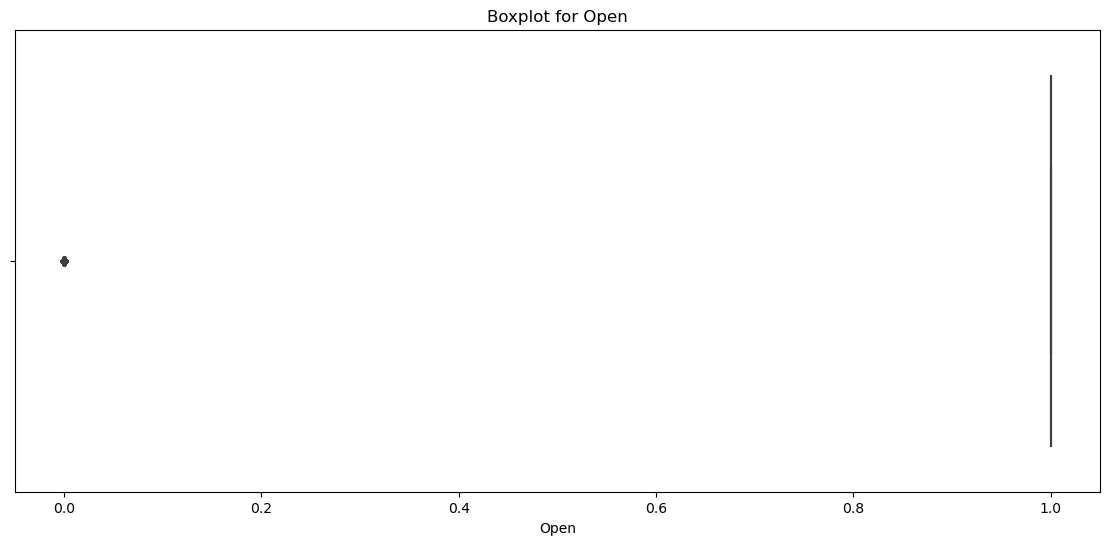

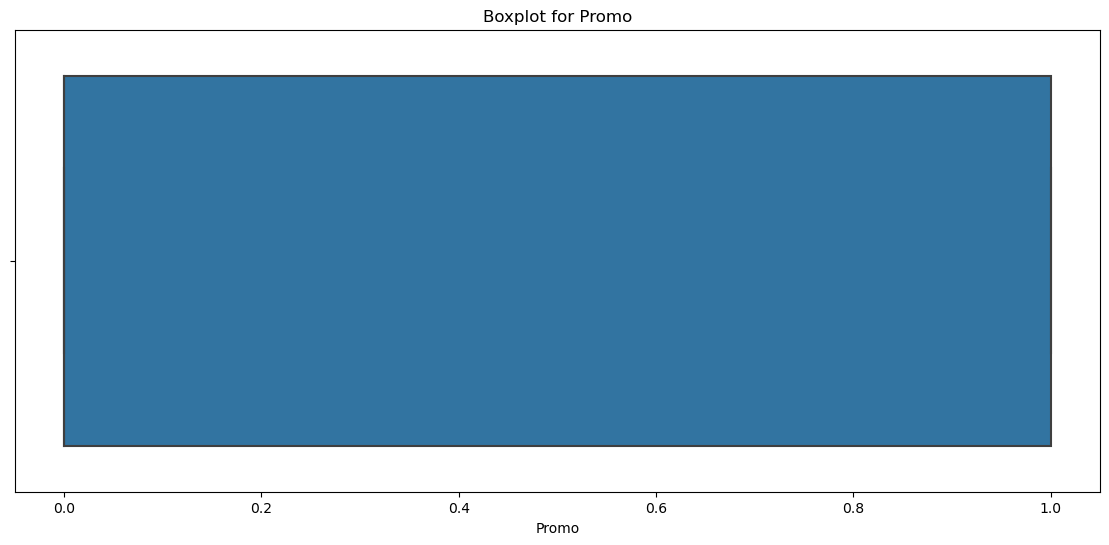

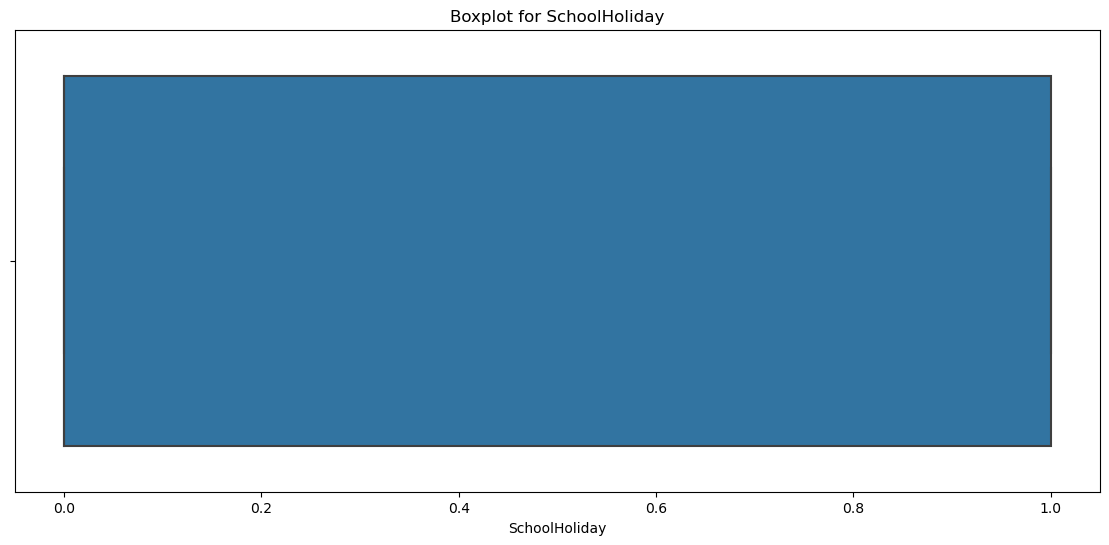

In [87]:
# Extracting numeric columns
numeric_columns = ['Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday']

# Creating box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=df_test[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


Insight -> we are seeing outliers in 'Open' but none of the other columns have outliers 

Interpret Pair Plots:

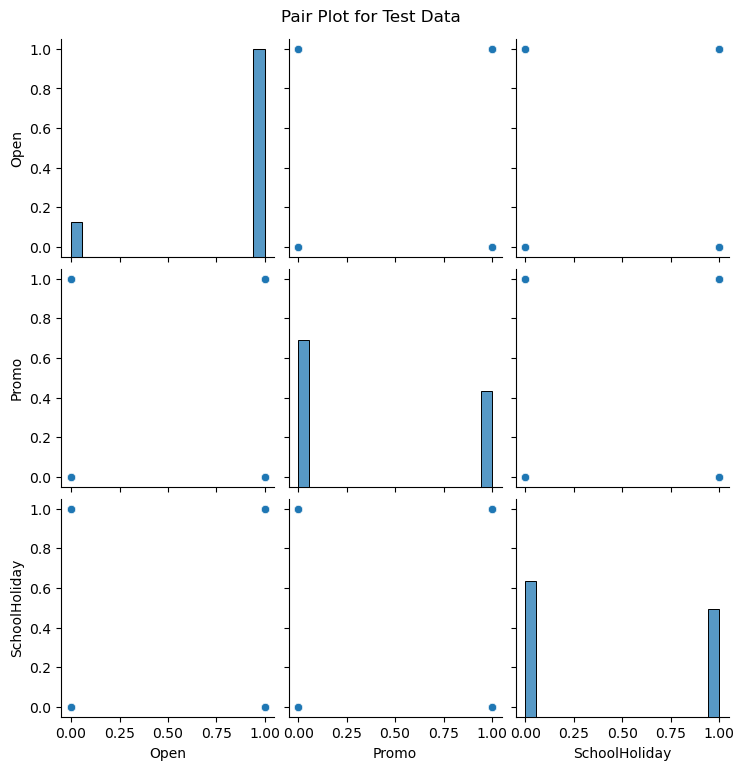

In [88]:
# Select numeric columns for pair plots
numeric_columns_test = ['Open', 'Promo', 'SchoolHoliday']

# Create pair plot for test data
sns.pairplot(df_test[numeric_columns_test])
plt.suptitle('Pair Plot for Test Data', y=1.02)
# plt.savefig('pairplot_test_data.png')
plt.show()

Correlation Analysis:

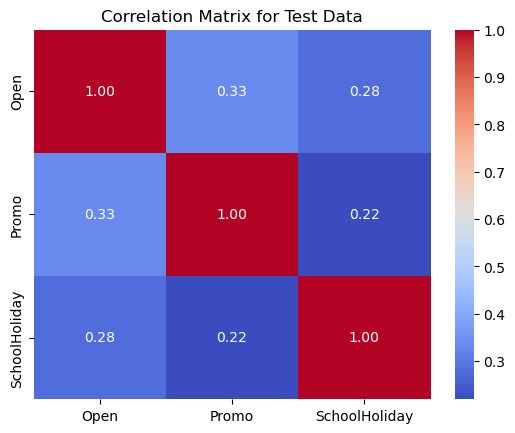

In [89]:
# Correlation matrix for store data
correlation_store = df_test[numeric_columns_test].corr()
sns.heatmap(correlation_store, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Test Data')
# plt.savefig('correlation_matrix_test_data.png')
plt.show()

###### Almost cleaned except some missing values in the "Open" column, we will just fill them with ffil

In [90]:
# Filling null with median
df_test['Open'].fillna(method='ffill',inplace=True)

df_test.isnull().sum()


Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

###### Now we convert datatypes: For Store we have two non numeric cloumns Storetype and Assortment

In [91]:
storetypes = ["a", "b", "c", "d"]
df_store['StoreType'] =df_store['StoreType'].apply(lambda x: storetypes.index(x))
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int64  
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval0             1115 non-null   int64  
 10  PromoInterval1             1115 non-null   int64  
 11  PromoInterval2             1115 non-null   int64  
 12  PromoInterval3             1115 non-null   int64  
dtypes: float64(5), int64(7), object(1)
memory usage:

In [92]:
# # Convert 'Assortment' to numeric values
assortment_mapping = {'a': 0, 'b': 1, 'c': 2}
df_store['Assortment'] = df_store['Assortment'].map(assortment_mapping).fillna(0).astype(int)
df_store.info()



# assortment = ["a", "b", "c"]
# df_store['Assortment'] = df_store['Assortment'].apply(lambda x: assortment.index(x))
# df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int64  
 2   Assortment                 1115 non-null   int32  
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval0             1115 non-null   int64  
 10  PromoInterval1             1115 non-null   int64  
 11  PromoInterval2             1115 non-null   int64  
 12  PromoInterval3             1115 non-null   int64  
dtypes: float64(5), int32(1), int64(7)
memory usage: 

In [93]:
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval0               0
PromoInterval1               0
PromoInterval2               0
PromoInterval3               0
dtype: int64

In [94]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1,4,7,10
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,1,4,7,10
3,4,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,0,0,0
4,5,0,0,2010.0,4.0,2015.0,0,0.0,0.0,0,0,0,0


##### For test & train data also there are two objects column which are Stateholiday and Date, but we need to convert the 0 in state holiday col to string first:

In [95]:
# Convert 0 to "0" in 'StateHoliday' column for both train and test datasets
df_train["StateHoliday"].loc[df_train["StateHoliday"] == 0] = "0"
df_test["StateHoliday"].loc[df_test["StateHoliday"] == 0] = "0"

# Convert 'StateHoliday' values to indices for both train and test datasets
stateholidays = ["0", "a", "b", "c"]

def map_stateholiday(value):
    try:
        return stateholidays.index(value)
    except ValueError:
        return -1

df_train['StateHoliday'] = df_train['StateHoliday'].apply(map_stateholiday)
df_test['StateHoliday'] = df_test['StateHoliday'].apply(map_stateholiday)

# Convert 'Date' column to datetime for both train and test datasets
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])


In [103]:
# Check the data
df_train.info()
df_test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          990515 non-null   float64       
 4   Customers      979114 non-null   float64       
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  835488 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 69.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088

In [105]:
df_train.isnull().sum()
# df_test.isnull().sum()

Store                 0
DayOfWeek             0
Date                  0
Sales             26694
Customers         38095
Open                  0
Promo                 0
StateHoliday          0
SchoolHoliday    181721
dtype: int64

In [109]:
df_train['Sales'].fillna(df_train['Sales'].median(), inplace = True)
df_train['Customers'].fillna(df_train['Customers'].median(), inplace = True)
df_train['SchoolHoliday'].fillna(df_train['SchoolHoliday'].median(), inplace = True)

df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [112]:
df_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [113]:
# Now we store the cleaned data in csv

In [114]:
df_store.to_csv("cleaned_df_store.csv",index = False)
df_train.to_csv("cleaned_df_train.csv",index = False)
df_test.to_csv("cleaned_df_test.csv",index = False)

#### Now we moves to perform EDA  !!!!! 